<h1 align=left><font size = 5>Final Assignment - Part A</font></h1>

## Import the relevant libraries for this code

This section is used to bring in all the relevant libraries and functions needed for this assignment.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

## Import and break down the data

Firstly, the data set needs to be brought in.
Note, the path given in the assignment did not work, but the path from one of the exercises did. I manually compared this data, and it is the same.

In [3]:
#concrete_data = pd.read_csv('https://cocl.us/concrete_data.csv')
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')


The data was then broken down into the labels and the targets.

In [4]:
y=concrete_data['Strength']
X=concrete_data.drop(columns='Strength')
n_cols = X.shape[1]

Using the sklearn library, the data was first split into train/test. (Although this was not needed at this stage)

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# X_tr, X_t, y_tr, y_t = train_test_split( X, y, test_size=0.3, random_state=4)

In the future, we might consider standardising the data at this stage. Realistically, it should happen after the data is split between train/test.

In [6]:

#X_tr=preprocessing.StandardScaler().fit(X_tr).transform(X_tr.astype(float))
print('No standadisation was done in this part')
X_tr=X
y_tr=y

No standadisation was done in this part


## The function for the model

Here, the main parameters of the model is created. This will be called back once training is done.

In [7]:
def baseline_model():
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


## Training of the model

The model is created. Note, the verbose=2 is useful to see the full line of outputs, but this can be quite crowded.
Consider changing to verbose = 0 to make this thing not go for ages.

In [8]:
model = baseline_model()
A=model.fit(X_tr,y_tr,validation_split=0.3, epochs=50, verbose=0)

out_loss=np.zeros(50)
loss_agg_norm = np.array([])

for i in range(1,51):
    A=model.fit(X_tr,y_tr,validation_split=0.3, epochs=50, verbose=0)
    mse_loss = model.evaluate(X_tr, y_tr, verbose=0)
    print("Iteration: %2.0f" % i, " with MSE: %.3f" % mse_loss)
    out_loss[i-1]=mse_loss
    


Iteration:  1  with MSE: 64.430
Iteration:  2  with MSE: 58.348
Iteration:  3  with MSE: 56.620
Iteration:  4  with MSE: 58.420
Iteration:  5  with MSE: 55.913
Iteration:  6  with MSE: 56.449
Iteration:  7  with MSE: 65.366
Iteration:  8  with MSE: 55.553
Iteration:  9  with MSE: 61.303
Iteration: 10  with MSE: 55.165
Iteration: 11  with MSE: 54.999
Iteration: 12  with MSE: 55.675
Iteration: 13  with MSE: 57.194
Iteration: 14  with MSE: 57.339
Iteration: 15  with MSE: 56.081
Iteration: 16  with MSE: 62.383
Iteration: 17  with MSE: 56.612
Iteration: 18  with MSE: 55.659
Iteration: 19  with MSE: 57.039
Iteration: 20  with MSE: 57.440
Iteration: 21  with MSE: 56.613
Iteration: 22  with MSE: 56.767
Iteration: 23  with MSE: 65.306
Iteration: 24  with MSE: 56.942
Iteration: 25  with MSE: 55.104
Iteration: 26  with MSE: 56.686
Iteration: 27  with MSE: 58.480
Iteration: 28  with MSE: 63.969
Iteration: 29  with MSE: 56.589
Iteration: 30  with MSE: 58.725
Iteration: 31  with MSE: 61.356
Iteratio

Once the model has been fit, it can be analised through its history:

In [9]:
mean_A=np.mean(out_loss)
stdev_A=np.std(out_loss)












For a better understanding of what the history of the training did, here is a plot:

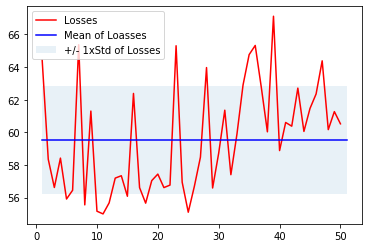

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,51),out_loss,'r')
plt.plot([1, 51],[mean_A, mean_A],'b')
plt.fill_between([1, 51],[mean_A-1*stdev_A, mean_A-1*stdev_A],[mean_A+1*stdev_A, mean_A+1*stdev_A], alpha=0.10)
plt.legend(('Losses','Mean of Loasses', '+/- 1xStd of Losses'))

## Conclusion

There is a hint that the losses are growing towards the end of the 50 repetitions, will most of the final 15 outputs being above average.

The final numbers are:

In [11]:
print("The mean of the mean squared errors is: : %.2f" % mean_A)
print("The standard deviation of the mean squared errors is: : %.2f" % stdev_A)

The mean of the mean squared errors is: : 59.55
The standard deviation of the mean squared errors is: : 3.30
